In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
music = pd.read_csv('/content/mxmh_survey_results.csv')

In [ ]:
data1 = music.copy()

In [ ]:
data1

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [ ]:
data1.dtypes

Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object


Removing not needed columns

In [ ]:
# removing not needed columns
data1.drop(['Timestamp', 'Permissions', 'Music effects'], axis=1, inplace=True)

Removing Outliers

In [ ]:
# droping 2 rows with Depression value = 3.5
data1_index = data1[(data1['Depression'] > 3) & (data1['Depression'] < 4)].index
data1 = data1.drop(data1_index, axis=0)

In [ ]:
# droping two rows of BPM with value > 300
data1_index = data1[(data1['BPM'] > 300)].index
data1 = data1.drop(data1_index, axis=0)

In [ ]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,731.0,25.257182,12.068619,10.0,18.0,21.0,28.00,89.0
Hours per day,732.0,3.570423,3.033152,0.0,2.0,3.0,5.00,24.0
BPM,625.0,122.641600,33.923172,0.0,100.0,120.0,143.00,220.0
Anxiety,732.0,5.835383,2.794467,0.0,4.0,6.0,8.00,10.0
Depression,732.0,4.792350,3.032978,0.0,2.0,5.0,7.00,10.0
Insomnia,732.0,3.734973,3.091090,0.0,1.0,3.0,6.00,10.0
OCD,732.0,2.620902,2.834237,0.0,0.0,2.0,4.25,10.0


Encoding values 'Frequency..'

In [ ]:
# checking unique values for 'Frequency ...'
data1['Frequency [R&B]'].unique()
data1['Frequency [Rap]'].unique()
data1['Frequency [Rock]'].unique()
data1['Frequency [Video game music]'].unique()

array(['Sometimes', 'Rarely', 'Very frequently', 'Never'], dtype=object)

In [ ]:
# changing data types in 'Frequeny ...' columns
def encode_Frequency(Frequency : str) -> int:
    if Frequency == 'Never':
        return 0
    elif Frequency == 'Rarely':
        return 1
    elif Frequency == 'Sometimes':
        return 2
    else:
        return 3


In [ ]:
data1['Frequency [R&B]'] = data1['Frequency [R&B]'].apply(encode_Frequency)
data1['Frequency [Pop]'] = data1['Frequency [Pop]'].apply(encode_Frequency)
data1['Frequency [Rap]'] = data1['Frequency [Rap]'].apply(encode_Frequency)
data1['Frequency [Rock]'] = data1['Frequency [Rock]'].apply(encode_Frequency)
data1['Frequency [Video game music]'] = data1['Frequency [Video game music]'].apply(encode_Frequency)
data1['Frequency [Classical]'] = data1['Frequency [Classical]'].apply(encode_Frequency)
data1['Frequency [Country]'] = data1['Frequency [Country]'].apply(encode_Frequency)
data1['Frequency [EDM]'] = data1['Frequency [EDM]'].apply(encode_Frequency)
data1['Frequency [Folk]'] = data1['Frequency [Folk]'].apply(encode_Frequency)
data1['Frequency [Gospel]'] = data1['Frequency [Gospel]'].apply(encode_Frequency)
data1['Frequency [Hip hop]'] = data1['Frequency [Hip hop]'].apply(encode_Frequency)
data1['Frequency [K pop]'] = data1['Frequency [K pop]'].apply(encode_Frequency)
data1['Frequency [Latin]'] = data1['Frequency [Latin]'].apply(encode_Frequency)
data1['Frequency [Lofi]'] = data1['Frequency [Lofi]'].apply(encode_Frequency)
data1['Frequency [Metal]'] = data1['Frequency [Metal]'].apply(encode_Frequency)
data1['Frequency [Jazz]'] = data1['Frequency [Jazz]'].apply(encode_Frequency)

In [ ]:
# to do:
# chi square or anova
# X = data1[['Depression']]
# y = data1[['Age', 'Hours per day', 'Anxiety']]
# data = pd.concat((X,y), axis=1)
# corr = data.corr()
# sns.heatmap(corr,
#         xticklabels=corr.columns,
#         yticklabels=corr.columns)

In [ ]:
# changing data types in 'Fav genre' column
# def encode_Fav(Fav : str) -> int:
#     if Fav == 'Classical':
#         return 0
#     elif Fav == 'Country':
#         return 1
#     elif Fav == 'EDM':
#         return 2
#     elif Fav == 'Folk':
#         return 3
#     elif Fav == 'Gospel':
#         return 4
#     elif Fav == 'Hip hop':
#         return 5
#     elif Fav == 'Jazz':
#         return 6
#     elif Fav == 'K pop':
#         return 7
#     elif Fav == 'Latin':
#         return 8
#     elif Fav == 'Lofi':
#         return 9
#     elif Fav == 'Metal':
#         return 10
#     elif Fav == 'Pop':
#         return 11
#     elif Fav == 'R&B':
#         return 12
#     elif Fav == 'Rap':
#         return 13
#     elif Fav == 'Rock':
#         return 14
#     else:
#         return 15


In [ ]:
# data1['Fav genre'] = data1['Fav genre'].apply(encode_Fav)

Filling up NaN values in 'BPM'

<Axes: >

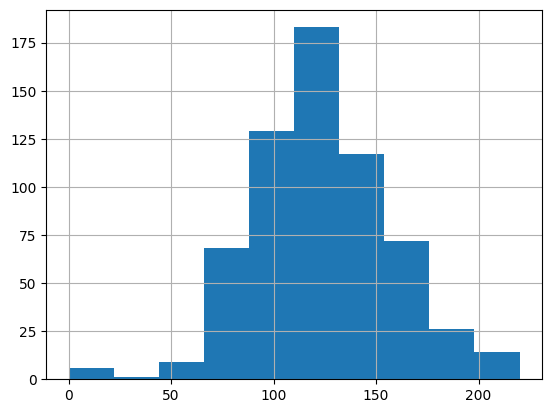

In [ ]:
# first graph with 'BPM'
data1['BPM'].hist()

In [ ]:
# to compare with data after filling up NaN values in 'BPM'
data1['BPM'].describe()

count    625.000000
mean     122.641600
std       33.923172
min        0.000000
25%      100.000000
50%      120.000000
75%      143.000000
max      220.000000
Name: BPM, dtype: float64

In [ ]:
# numer of NaN values in 'BPM'
data1['BPM'].isna().sum()

107

In [ ]:
# filling up NaN values in 'BPM' by groupby median
data1['BPM'].fillna(
    data1.groupby([
       'Frequency [Hip hop]', 'Frequency [Metal]', 'Frequency [Pop]',
       'Frequency [Rock]'])[
        "BPM"
    ].transform("median"),
    inplace=True
)

In [ ]:
## remain only 4 values with NaN
data1['BPM'].isna().sum()

4

In [ ]:
# filling up remaining NaN with median
data1['BPM'].fillna(data1['BPM'].median(), inplace=True)

In [ ]:
# 'BPM' column contains no NaN values
data1['BPM'].isna().sum()

0

<Axes: >

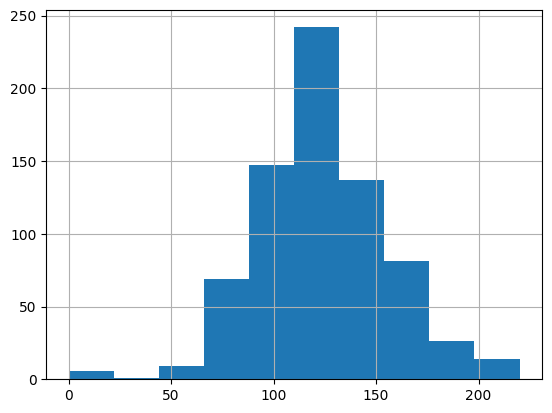

In [ ]:
# graph to compare with one above
data1['BPM'].hist()

In [ ]:
# data to compare with data above
data1['BPM'].describe()

count    732.000000
mean     122.909836
std       32.101968
min        0.000000
25%      103.000000
50%      120.000000
75%      140.000000
max      220.000000
Name: BPM, dtype: float64

Encoding data with 'Yes' or 'No' values to 0/1

In [ ]:
# changing data types in another columns
def encode_Exp(Exp : str) -> int:
    if Exp == 'No':
        return 0
    elif Exp == 'Yes':
        return 1

In [ ]:
data1['Exploratory'] = data1['Exploratory'].apply(encode_Exp)
data1['Composer'] = data1['Composer'].apply(encode_Exp)
data1['Foreign languages'] = data1['Foreign languages'].apply(encode_Exp)
data1['Instrumentalist'] = data1['Instrumentalist'].apply(encode_Exp)
data1['While working'] = data1['While working'].apply(encode_Exp)

In [ ]:
# filling up another NaN in columns with median

data1['Foreign languages'].fillna(data1['Foreign languages'].median().round(1), inplace=True)
data1['While working'].fillna(data1['While working'].median().round(1), inplace=True)
data1['Instrumentalist'].fillna(data1['Instrumentalist'].median().round(1), inplace=True)
data1['Composer'].fillna(data1['Composer'].median().round(1), inplace=True)
data1['Age'].replace([np.nan], data1['Age'].median(), inplace=True)
data1.loc[197, 'Primary streaming service'] = 'Other streaming service'

In [ ]:
# checking for NaN
pd.DataFrame(data1).isna().sum(axis=0)

Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia                        0
OCD           

In [ ]:
# checking for duplicates

data1.duplicated().sum()

0

For calssyfication we will change data type in 'Depression' on value 0/1

<Axes: >

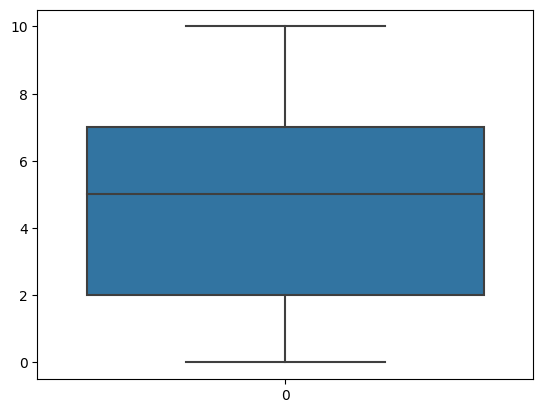

In [ ]:
# graph to see values in 'Depression'
sns.boxplot(data1['Depression'])

In [ ]:
# changing data types in 'Depression' column
def encode_Depression(Depression) -> int:
    if 0 <= Depression <= 5 :
        return 0
    else:
        return 1

data1['Depression'] = data1['Depression'].apply(encode_Depression)

In [ ]:
data1['Depression'].value_counts()

0    390
1    342
Name: Depression, dtype: int64

In [ ]:
data1['Depression']

0      0
1      0
2      1
3      1
4      0
      ..
731    1
732    0
733    0
734    0
735    0
Name: Depression, Length: 732, dtype: int64

In [ ]:
data1.shape

(732, 30)

After cleaning data, we can start classification

In [ ]:
# decision tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
data1.columns

Index(['Age', 'Primary streaming service', 'Hours per day', 'While working',
       'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory',
       'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD'],
      dtype='object')

In [ ]:
y = data1['Depression']
X = data1[['Age', 'Hours per day', 'While working',
       'Instrumentalist', 'Composer', 'Exploratory',
       'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Insomnia', 'OCD']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30, test_size=0.2)


Decision Tree

In [ ]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
gs=GridSearchCV(model,
               param_grid={'max_depth':range(1,10),
                           'min_samples_split':range(50,100,10),
                           'min_samples_leaf':range(10,50,10)},
               cv=5,
               scoring='neg_mean_absolute_error')
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(10, 50, 10),
                         'min_samples_split': range(50, 100, 10)},
             scoring='neg_mean_absolute_error')

In [ ]:
print(gs.best_params_)

{'max_depth': 3, 'min_samples_leaf': 40, 'min_samples_split': 50}


Using 'best_params' to train our model


In [ ]:
model = DecisionTreeClassifier(max_depth=gs.best_params_['max_depth'], min_samples_split=gs.best_params_['min_samples_split'])
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=50)

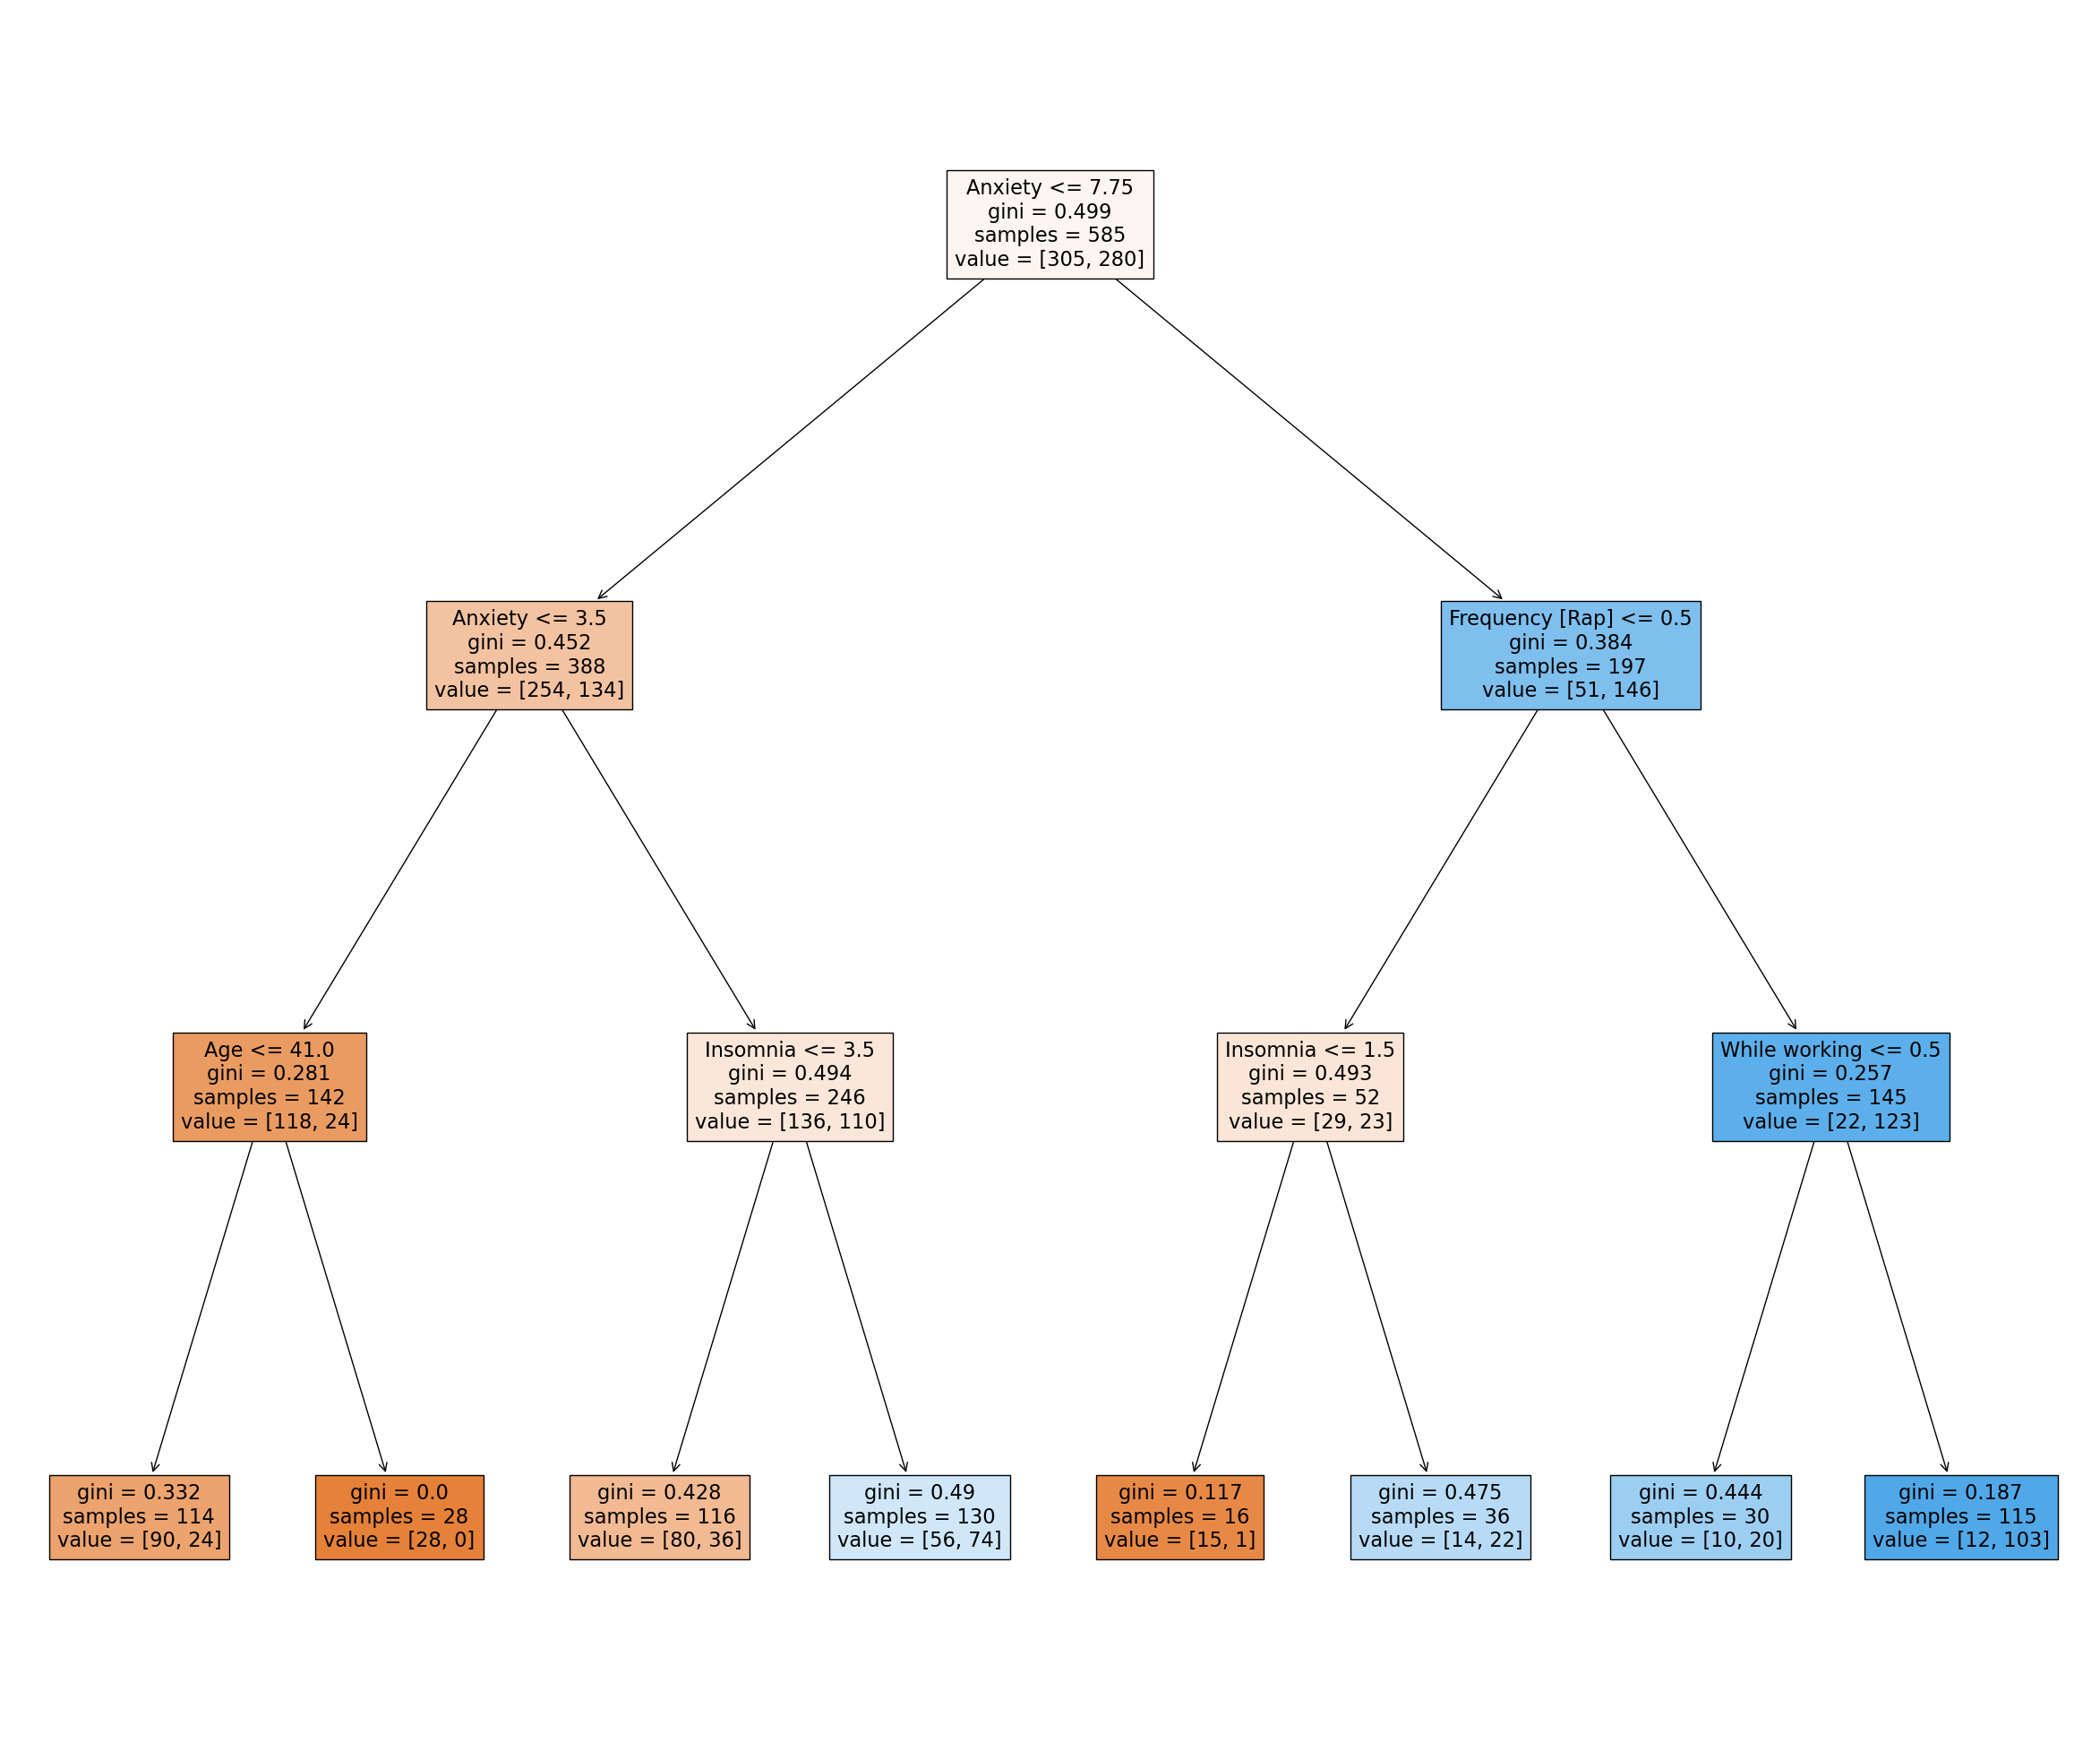

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(30,25))
_=tree.plot_tree(model,feature_names=X.columns,filled=True)

In [ ]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

Calculating prediction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


y_pred = model.predict(X_test)


report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.76      0.75      0.76        85
           1       0.67      0.68      0.67        62

    accuracy                           0.72       147
   macro avg       0.71      0.72      0.71       147
weighted avg       0.72      0.72      0.72       147



Calculating confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

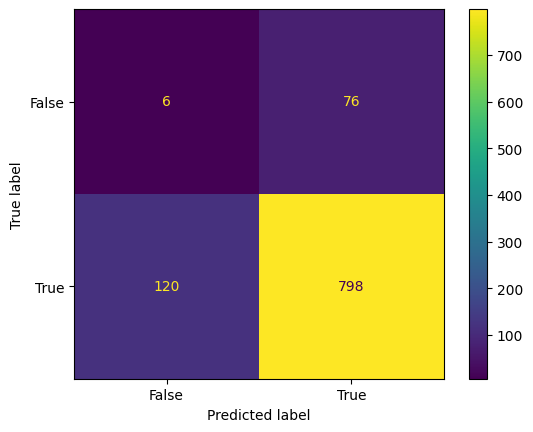

In [ ]:
cm_display.plot()
plt.show()

In [ ]:
# what is the most important in our model
feat_importance=model.tree_.compute_feature_importances(normalize=False)
feat_importance=pd.concat([X.columns.to_series().reset_index(drop=True),pd.Series(feat_importance)],axis=1)
feat_importance=feat_importance.sort_values(feat_importance.columns[1],ascending=False)
feat_importance

,0,1
24,Anxiety,0.093775
25,Insomnia,0.025444
21,Frequency [Rap],0.021566
2,While working,0.004265
0,Age,0.003406
14,Frequency [Jazz],0.000000
23,Frequency [Video game music],0.000000
22,Frequency [Rock],0.000000
20,Frequency [R&B],0.000000
19,Frequency [Pop],0.000000


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# average:
#   None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy

def calculate_metrics(target, prediction, average='macro'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total

def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

def plot_confusion_matrix(cm, title=None, title_appendix = '', cmap = plt.cm.Blues):

  # Obsługa tytułu
  if title_appendix:
    title_appendix = f'({title_appendix})'

  if title is None:
    title = f'Confusion Matrix {title_appendix}'

  fig, ax = plt.subplots(figsize = (10,5))

  img = ax.imshow(cm, cmap = cmap)

  ax.figure.colorbar(img, ax = ax)

  ax.set_xticks(np.arange(cm.shape[1]))
  ax.set_xticklabels(rotation = 45)

  ax.set_yticks(np.arange(cm.shape[0]))
  ax.set_yticklabels(rotation = 45)

  ax.set_title(title)
  ax.set_ylabel('True label')
  ax.set_xlabel('Predicted label')

  fmt = '.2f' if cm.dtype =='float' else 'd'

  for y, row in enumerate(cm):
    for x, cell in enumerate(row):
      ax.text(x,y, format(cell, fmt), ha ='center', color = 'white' if cell > cm.max()/2 else 'black')

  fig.tight_layout()

  return ax

def normalize_confusion_matrix(confusion_matrix):
  return confusion_matrix.astype('float') /confusion_matrix.sum(axis = 1)[np.newaxis].T


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, StratifiedKFold
def count_model(classifier, kfold, X,y, scaling = None, numeric_features = None, results = None, plot = None):

  if X is None:
    X = {}
    clf = classifier(**X)
  else:
    clf = classifier(**X)

  predicted = []
  target = []

  if scaling == 'minmax':
    scaler = MinMaxScaler()
  elif scaling == 'standard':
    scaler = StandardScaler()
  else:
    print('Wybierz scaler z listy: minmax, standard')

  for train_index, test_index in kfold.split(X,y):
    X_train, X_test = X.iloc[train_index].copy(), X.iloc[test_index].copy()
    y_train, y_test = y.iloc[train_index].copy(), y.iloc[test_index].copy()

    if scaling is not None:
      X_train_scaled = X_train.copy()
      X_test_scaled = X_test.copy()

      X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
      X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])

      X_train = X_train_scaled
      X_test = X_test_scaled

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    target = np.concatenate((target, y_test))
    predicted = np.concatenate((predicted, y_pred))

  if print_params:
    print('PARAMS:\n\n', clf.get_params(),'\n')

  if results:
    print('RESULTS:\n')
    print_results(calculate_metrics(target, predicted))

  if plot:
    print('PLOT:\n')
    plot_confusion_matrix(confusion_matrix(target, predicted))
    plot_confusion_matrix(normalize_confusion_matrix(confusion_matrix(target, predicted)))

**Random Forrest**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print_results(calculate_metrics(y_test, y_pred))

Results for classifier
----
  Accuracy:  0.7278911564625851
  Precision: 0.7308359013867489
  Recall:    0.7226867335562988
  F1 score:  0.7232680722891566
  Mislabeled 40 out of 147




**Data Visualization**

Importances

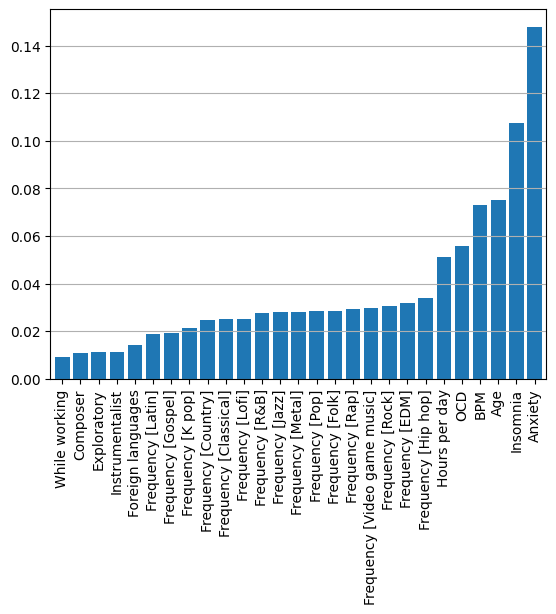

In [ ]:
importances = model.feature_importances_
std = np.std([model.feature_importances_ for tree in model.estimators_], axis = 0)

df = pd.Series(importances, index = X.columns).sort_values()

fig, ax = plt.subplots()

df.plot.bar(yerr = std, ax=ax, width = 0.8)
plt.grid(which = 'major', axis = 'y')

Influance of Anxiety and Insomnia on depression - graph

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

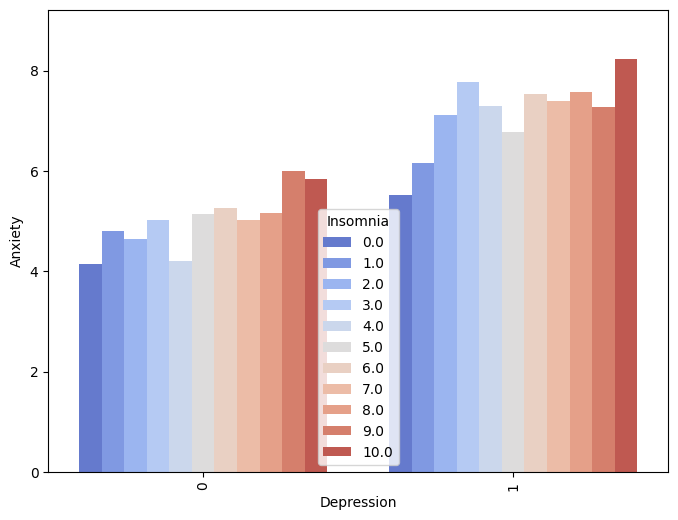

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=data1['Depression'], y=data1['Anxiety'], hue=data1['Insomnia'], errwidth=0, palette='coolwarm')
plt.xticks(rotation=90)

Influance of Age and Anxiety on depression - graph

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

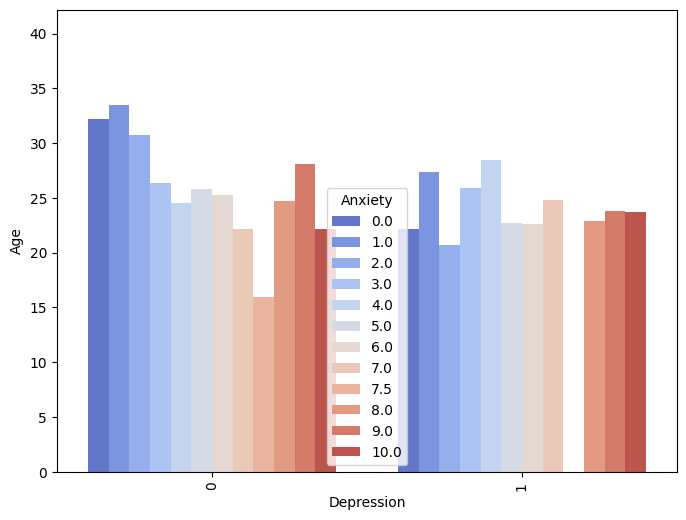

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=data1['Depression'], y=data1['Age'], hue=data1['Anxiety'], errwidth=0, palette='coolwarm')
plt.xticks(rotation=90)

Correlation between age and favourite music

<ipython-input-148-1b400d80da88>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=data1['Fav genre'], y=data1['Age'], ci=None)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

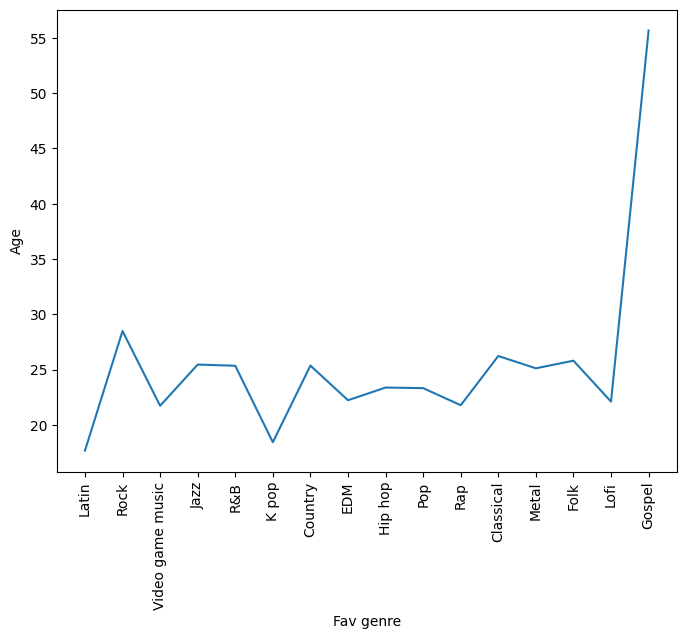

In [ ]:
plt.figure(figsize=(8,6))
sns.lineplot(x=data1['Fav genre'], y=data1['Age'], ci=None)
plt.xticks(rotation=90)

Correlation between listening to rap and favourite genre

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

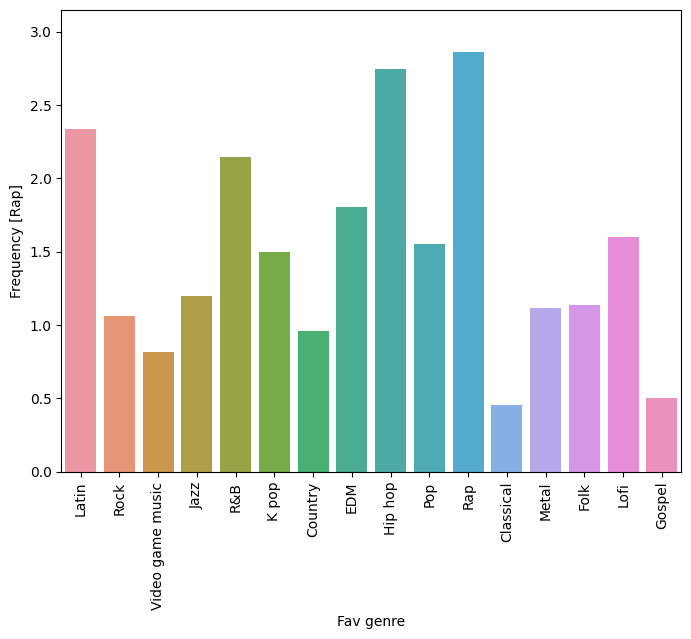

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=data1['Fav genre'], y=data1['Frequency [Rap]'], errwidth=0)
plt.xticks(rotation=90)

Age and Rap music according to fav genre

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Latin'),
  Text(1, 0, 'Rock'),
  Text(2, 0, 'Video game music'),
  Text(3, 0, 'Jazz'),
  Text(4, 0, 'R&B'),
  Text(5, 0, 'K pop'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'EDM'),
  Text(8, 0, 'Hip hop'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Rap'),
  Text(11, 0, 'Classical'),
  Text(12, 0, 'Metal'),
  Text(13, 0, 'Folk'),
  Text(14, 0, 'Lofi'),
  Text(15, 0, 'Gospel')])

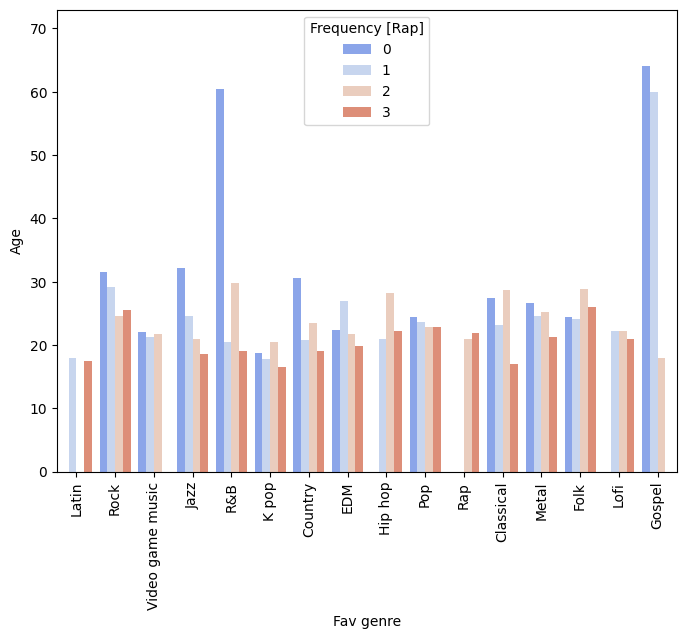

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=data1['Fav genre'], y=data1['Age'], hue=data1['Frequency [Rap]'], errwidth=0, palette='coolwarm')
plt.xticks(rotation=90)

In [ ]:
y = data1['Depression']
X = data1[['Age', 'While working',
       'Frequency [Rap]', 'Anxiety', 'Insomnia']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30, test_size=0.2)

In [ ]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
gs=GridSearchCV(model,
               param_grid={'max_depth':range(1,10),
                           'min_samples_split':range(50,100,10),
                           'min_samples_leaf':range(10,50,10)},
               cv=5,
               scoring='neg_mean_absolute_error')
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(10, 50, 10),
                         'min_samples_split': range(50, 100, 10)},
             scoring='neg_mean_absolute_error')

In [ ]:
print(gs.best_params_)

{'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 90}


In [ ]:
model = DecisionTreeClassifier(max_depth=gs.best_params_['max_depth'], min_samples_split=gs.best_params_['min_samples_split'])
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=90)

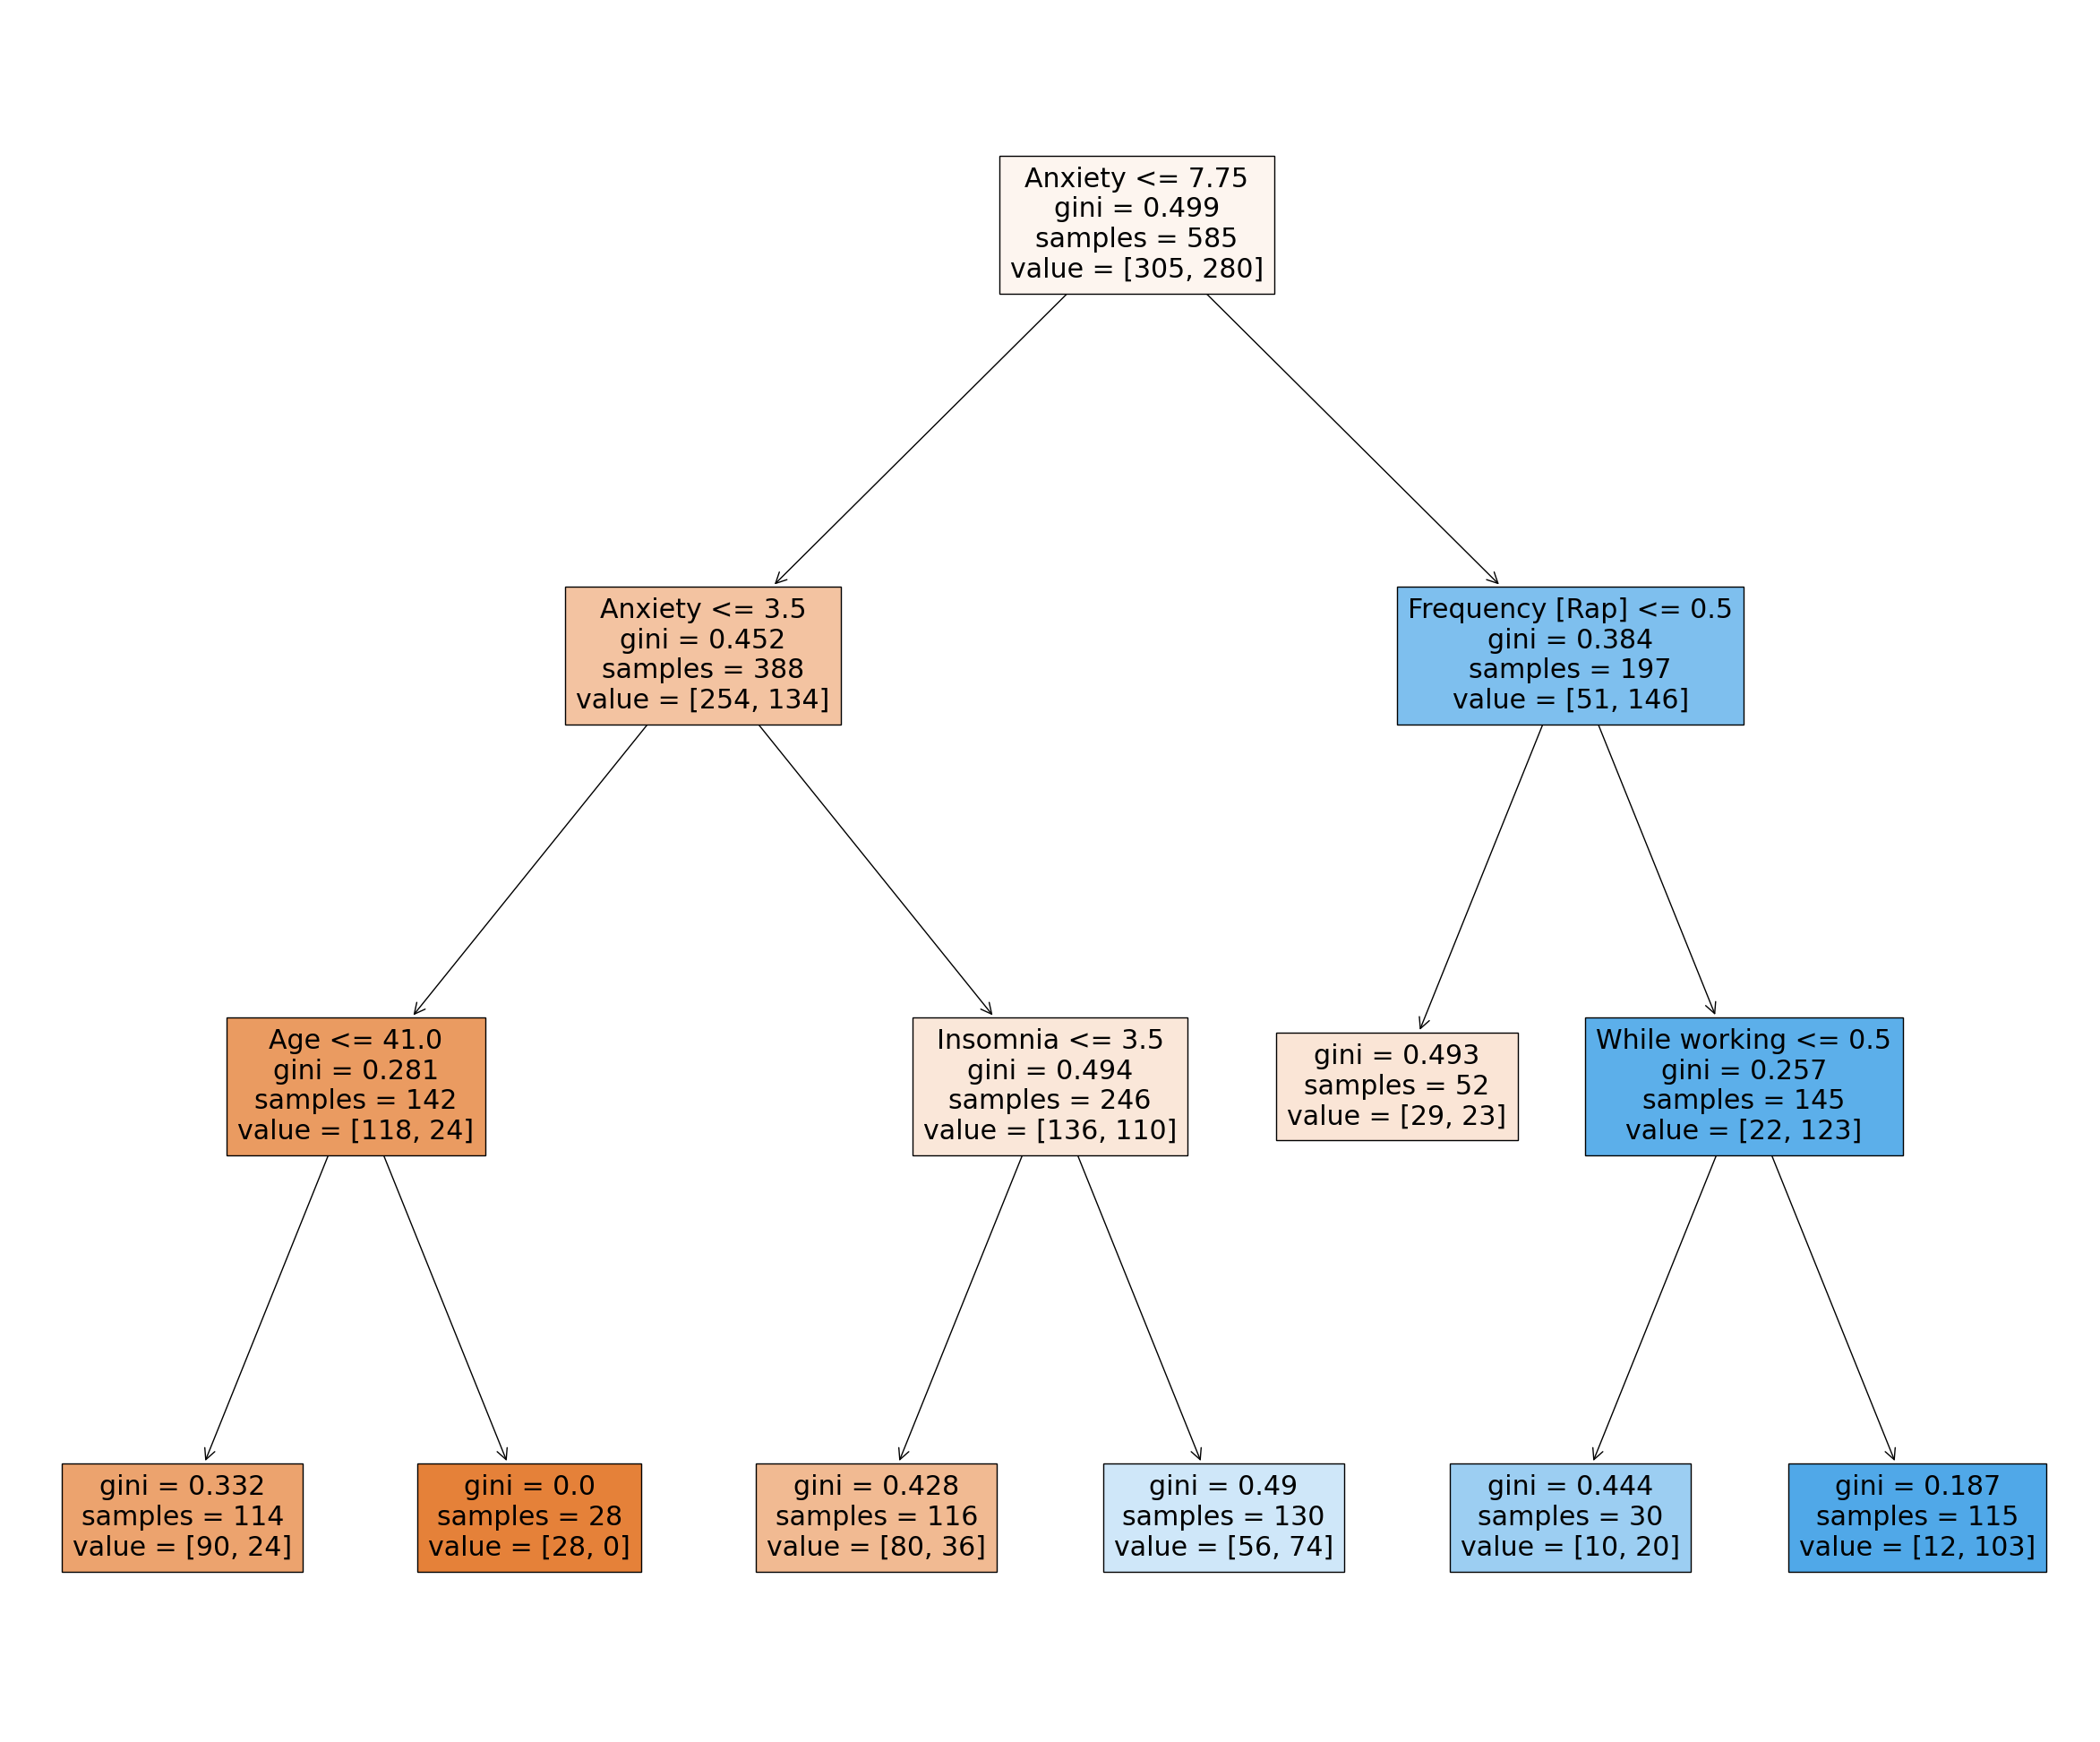

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(30,25))
_=tree.plot_tree(model,feature_names=X.columns,filled=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Predykcja dla zestawu testowego
y_pred = model.predict(X_test)

# Obliczanie miar recall i precision
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.73      0.78      0.75        85
           1       0.66      0.60      0.63        62

    accuracy                           0.70       147
   macro avg       0.69      0.69      0.69       147
weighted avg       0.70      0.70      0.70       147



In [ ]:
# what is the most important in our model
feat_importance=model.tree_.compute_feature_importances(normalize=False)
feat_importance=pd.concat([X.columns.to_series().reset_index(drop=True),pd.Series(feat_importance)],axis=1)
feat_importance=feat_importance.sort_values(feat_importance.columns[1],ascending=False)
feat_importance

,0,1
3,Anxiety,0.093775
2,Frequency [Rap],0.021566
4,Insomnia,0.014046
1,While working,0.004265
0,Age,0.003406
